<a href="https://colab.research.google.com/github/leoxiang66/machine-learning/blob/MLO/examples/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
!pip install git+https://github.com/leoxiang66/machine-learning.git@MLO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/leoxiang66/machine-learning.git (to revision MLO) to /tmp/pip-req-build-rzldyncg
  Running command git clone -q https://github.com/leoxiang66/machine-learning.git /tmp/pip-req-build-rzldyncg
  Running command git checkout -b MLO --track origin/MLO
  Switched to a new branch 'MLO'
  Branch 'MLO' set up to track remote branch 'MLO' from 'origin'.


In [124]:
import torch
import torch
from torch.nn.parameter import Parameter
from torch.distributions.normal import Normal
from torch.distributions.uniform import Uniform

In [125]:
uniform_dist = Uniform(torch.tensor([0.0]), torch.tensor([1.0]))
X = uniform_dist.sample(torch.Size([1000]))
epsilon = Normal(0,0.5)

In [126]:
epsilon.sample()

tensor(0.5726)

In [127]:
X.size()

torch.Size([1000, 1])

In [128]:
X[0]

tensor([0.5751])

In [129]:
Y = torch.tensor([[x+epsilon.sample()] for x in X])
Y.size()

torch.Size([1000, 1])

In [130]:
Y[0]

tensor([0.6232])

# P4.1

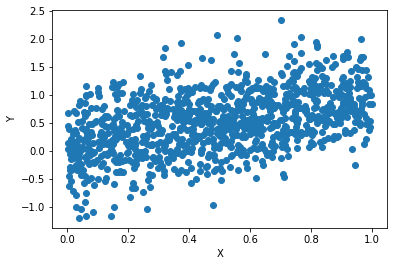

In [131]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# P4.2

## Training

This code section is just for a comparison with the grouth truth LS solution

In [132]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 100

lr = regression.linearRegression(inputDim, outputDim)

In [133]:
lr(X[:2])

tensor([[0.4525],
        [0.1258]], grad_fn=<MmBackward0>)

In [134]:
loss_fn = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(lr.parameters(), lr=learningRate)

In [135]:
for i in range(1,1001):
    outputs = lr(X)
    optimizer.zero_grad()

    loss = loss_fn(outputs,Y)

    if i%100 == 0:
        print(f'Loss at {i} epoch: {loss.item()}')

    loss.backward()
    optimizer.step()

Loss at 100 epoch: 0.2340949922800064
Loss at 200 epoch: 0.23409494757652283
Loss at 300 epoch: 0.23409496247768402
Loss at 400 epoch: 0.23409496247768402
Loss at 500 epoch: 0.23409496247768402
Loss at 600 epoch: 0.23409496247768402
Loss at 700 epoch: 0.23409496247768402
Loss at 800 epoch: 0.23409496247768402
Loss at 900 epoch: 0.23409496247768402
Loss at 1000 epoch: 0.23409496247768402


In [136]:
Y_hat = lr(X)

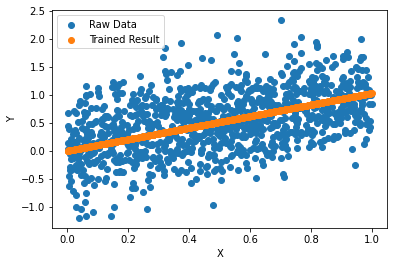

In [137]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y, label = 'Raw Data')
plt.scatter(x=X,y=Y_hat.detach().numpy(),label = 'Trained Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## LSE solution

In [138]:
lse_lr = linearRegression(1,1)


In [139]:
for i in lse_lr.linear.parameters():
    print(i)

Parameter containing:
tensor([[-0.1011]], requires_grad=True)


In [140]:
(X.T).size()

torch.Size([1, 1000])

In [141]:
def compute_lse(X,y):
    tmp = torch.matmul(X.T, X)
    tmp = torch.inverse(tmp)
    tmp = torch.matmul(tmp,X.T)
    tmp = torch.matmul(tmp,y)

    return tmp

In [142]:
lse = compute_lse(X,Y)
lse

tensor([[1.0325]])

In [143]:
lse_lr.linear.weight = torch.nn.Parameter(lse) 

In [144]:
Y_lse = lse_lr(X)

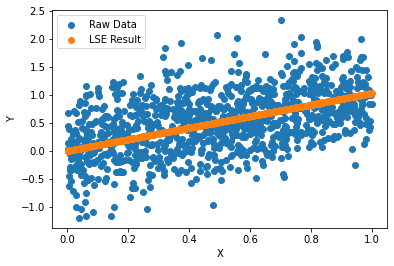

In [145]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y, label = 'Raw Data')
plt.scatter(x=X,y=Y_lse.detach().numpy(),label = 'LSE Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Training Error

In [146]:
loss_fn(Y_hat, Y_lse).item()

7.249628279420647e-14

# P 4.4

In [147]:
xi = Normal(0,0.1)

In [148]:
Y = torch.tensor([[30*torch.square(x-0.25)*torch.square(x-0.75) + xi.sample()] for x in X])
Y.size()

torch.Size([1000, 1])

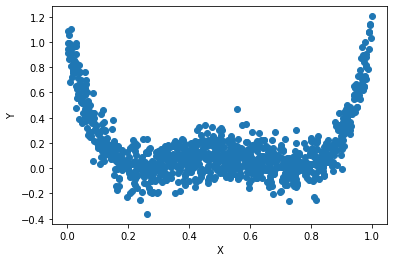

In [149]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [150]:
# uniform_dist = Uniform(torch.tensor([-1.0]), torch.tensor([1.0]))
# X = uniform_dist.sample(torch.Size([1000]))
# z = Normal(0,1)
# Y = torch.Tensor([x[0]+1+ z.sample() for x in X])

**First we build the new $X$ matrix which is the polynomial form of $X$**

In [151]:
def pd(x, dim: int):
    result = [1]
    for i in range(dim):
        result.append(torch.pow(x,(i+1)))
    return torch.Tensor(result)


In [152]:
pd(X[0][0],4)

tensor([1.0000, 0.5751, 0.3307, 0.1902, 0.1094])

In [153]:
dim = 5

In [154]:
tmp = [pd(x[0],dim) for x in X]

In [155]:
X_new = torch.stack(tmp, dim = 0)
X_new.size()

torch.Size([1000, 6])

**After we have the new $X$, we can compute the LSE solution.**

In [156]:
lse = compute_lse(X_new,Y)
lse

tensor([[  1.0205],
        [-10.6547],
        [ 37.5892],
        [-50.9040],
        [ 20.1988],
        [  3.8360]])

**To plot the LSE result, we generate $Y$ using the LSE solution**

In [157]:
def forward(X, param):
    tmp = [pd(x[0],dim) for x in X]
    X_new = torch.stack(tmp, dim = 0)
    return torch.matmul(X_new,param)

In [158]:
Y_lse = forward(X,lse)
Y_lse.size()

torch.Size([1000, 1])

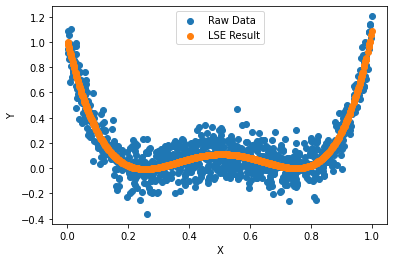

In [159]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y, label = 'Raw Data')
plt.scatter(x=X,y=Y_lse.detach().numpy(),label = 'LSE Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [160]:
from supervised_learning import regression

In [161]:
d_max = 10
losses = []
dimensions = [d for d in range(1,d_max)]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


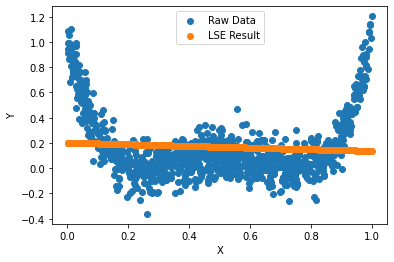

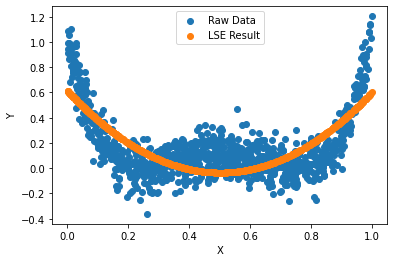

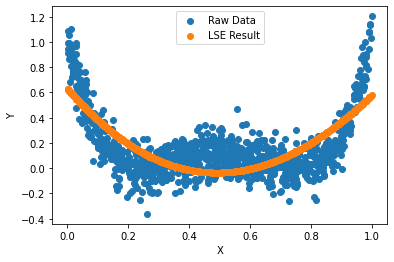

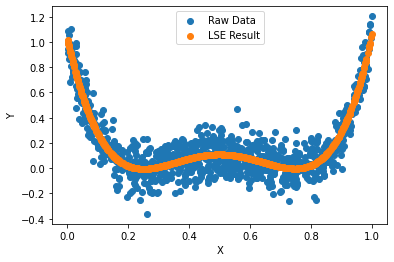

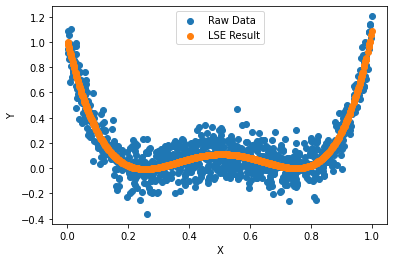

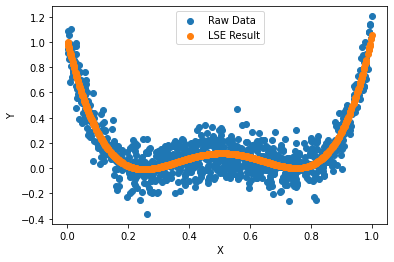

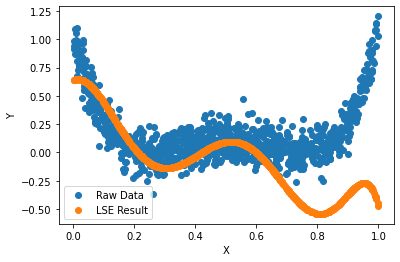

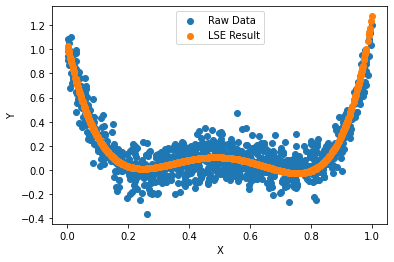

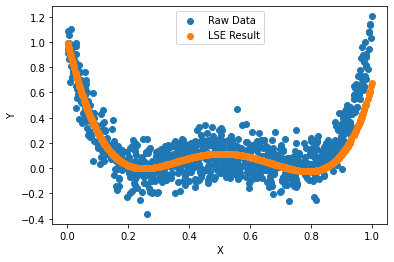

In [162]:
for d in dimensions:
    poly = regression.PolynomialRegression(d,1)
    poly.fit_lse(X,Y)
    y_hat = poly(X).flatten()
    loss = loss_fn(y_hat,Y).item()
    losses.append(loss)

    plt.scatter(x=X,y=Y, label = 'Raw Data')
    plt.scatter(x=X,y=y_hat.detach().numpy(),label = 'LSE Result')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()